This notebook demonstrates the pipeline for running site response simulations in batch. You can choose to run the simulations using multiple CPU processors.

In [1]:
from PySeismoSoil.class_ground_motion import Ground_Motion
from PySeismoSoil.class_Vs_profile import Vs_Profile
from PySeismoSoil.class_curves import Multiple_GGmax_Damping_Curves
from PySeismoSoil.class_parameters import HH_Param_Multi_Layer
from PySeismoSoil.class_simulation import Linear_Simulation, Equiv_Linear_Simulation, Nonlinear_Simulation
from PySeismoSoil.class_batch_simulation import Batch_Simulation

# 1. Linear simulations in batch

In [2]:
accel_in = Ground_Motion('../PySeismoSoil/tests/files/sample_accel.txt', unit='gal')
profile_1 = Vs_Profile('../PySeismoSoil/tests/files/profile_FKSH14.txt')
profile_2 = Vs_Profile('../PySeismoSoil/tests/files/profile_P001.txt')

In [3]:
lin_sim_1 = Linear_Simulation(profile_1, accel_in, boundary='rigid')
lin_sim_2 = Linear_Simulation(profile_2, accel_in, boundary='elastic')

In [4]:
batch_lin_sim = Batch_Simulation([lin_sim_1, lin_sim_2])

Parallel computing in progress... done.


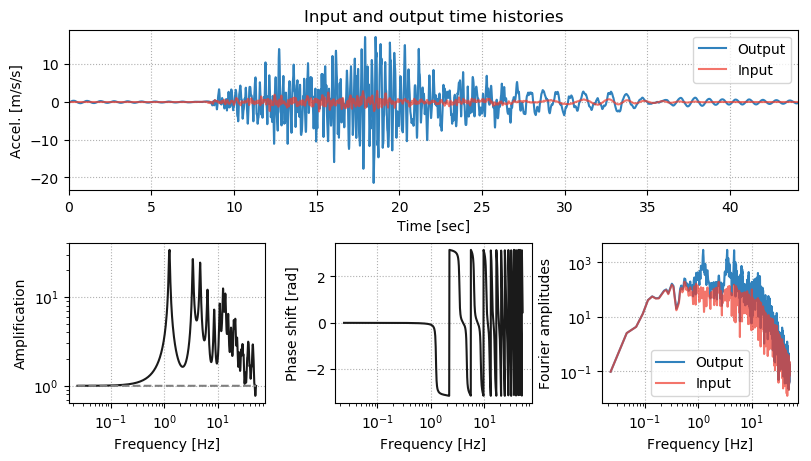

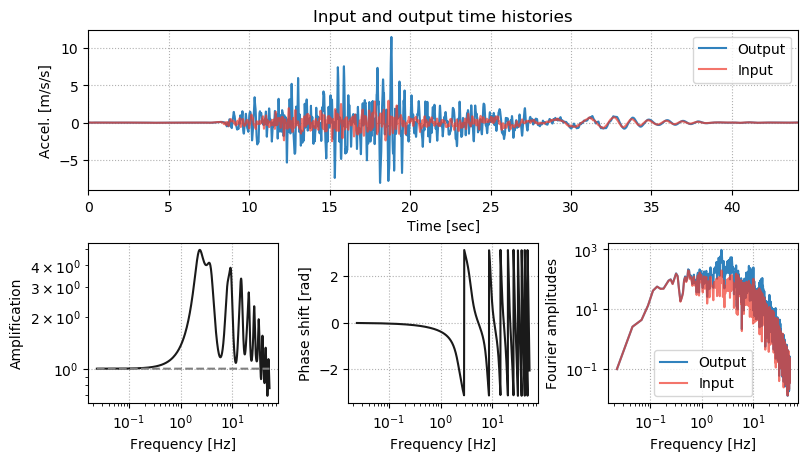

In [5]:
lin_results = batch_lin_sim.run(parallel=True, n_cores=2, options=dict(every_layer=False, show_fig=True))

In [6]:
lin_results

# 2. Equivalent linear simulations in batch

In [7]:
curves_1 = Multiple_GGmax_Damping_Curves(data='../PySeismoSoil/tests/files/curve_FKSH14.txt')
curves_2 = Multiple_GGmax_Damping_Curves(data='../PySeismoSoil/tests/files/curve_P001.txt')

(To see how to construct $G/G_{\max}$ and damping curves from $V_S$ profiles, go to [this notebook](./Pipeline_04_Equivalent_Linear_Method.ipynb).)

In [8]:
equiv_sim_1 = Equiv_Linear_Simulation(profile_1, accel_in, curves_1, boundary='elastic')
equiv_sim_2 = Equiv_Linear_Simulation(profile_2, accel_in, curves_2, boundary='elastic')

In [9]:
batch_equiv_sim = Batch_Simulation([equiv_sim_1, equiv_sim_2])

In [10]:
equiv_results = batch_equiv_sim.run(parallel=True, n_cores=2, options=dict(verbose=True, show_fig=False));

Parallel computing in progress... done.


In [11]:
equiv_results

# 3. Nonlinear simulations in batch

In [12]:
hh_g_param_1 = HH_Param_Multi_Layer('../PySeismoSoil/tests/files/HH_G_FKSH14.txt')
hh_g_param_2 = HH_Param_Multi_Layer('../PySeismoSoil/tests/files/HH_G_P001.txt')

In [13]:
hh_x_param_1 = HH_Param_Multi_Layer('../PySeismoSoil/tests/files/HH_X_FKSH14.txt')
hh_x_param_2 = HH_Param_Multi_Layer('../PySeismoSoil/tests/files/HH_X_P001.txt')

(To see how to construct HH parameters for $G/G_{\max}$ and damping behaviors, go to [this notebook](./Pipeline_05_Nonlinear_Method.ipynb).)

In [14]:
nonl_sim_1 = Nonlinear_Simulation(profile_1, accel_in, G_param=hh_g_param_1, xi_param=hh_x_param_1, boundary='elastic')
nonl_sim_2 = Nonlinear_Simulation(profile_2, accel_in, G_param=hh_g_param_2, xi_param=hh_x_param_2, boundary='rigid')

In [15]:
batch_nonl_sim = Batch_Simulation([nonl_sim_1, nonl_sim_2])

In [16]:
nonl_results = batch_nonl_sim.run(parallel=True, n_cores=2, options=dict(remove_sim_dir=True, verbose=True, show_fig=False))

Parallel computing in progress... done.


In [17]:
nonl_results

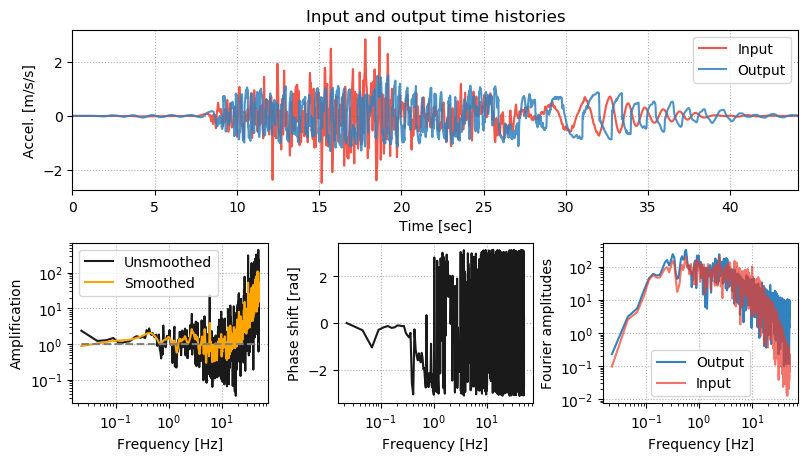

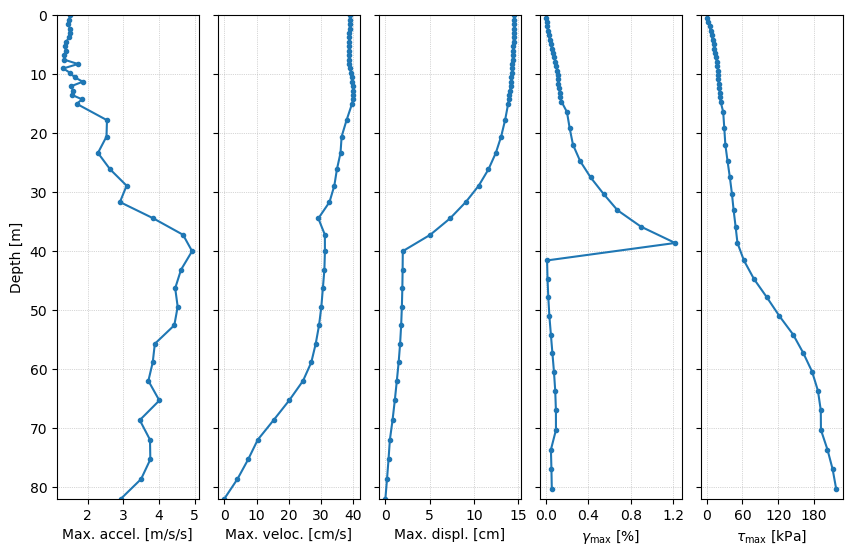

In [18]:
nonl_results[1].plot();